In [1]:
import torch
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Make sure you are connected to a GPU instance
torch.cuda.is_available()

True

In [3]:
# Load from torchhub
preprocess, postprocess, model = torch.hub.load('tnwei/waternet', 'waternet')
model.eval();

/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/tnwei/waternet/zipball/main" to /root/.cache/torch/hub/main.zip
Downloading: "https://www.dropbox.com/s/j8ida1d86hy5tm4/waternet_exported_state_dict-daa0ee.pt?dl=1" to /root/.cache/torch/hub/checkpoints/waternet_exported_state_dict-daa0ee.pt


In [4]:
#!wget https://upload.wikimedia.org/wikipedia/commons/e/ea/ScubaDiver.jpg

In [6]:
# Load one image using OpenCV
im = cv2.imread("//content//fotik.jpeg")
rgb_im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

In [7]:
# Resize image
rgb_im = cv2.resize(rgb_im, (720, 480))

In [8]:
# Inference -> return numpy array (1, 3, H, W)
rgb_ten, wb_ten, he_ten, gc_ten = preprocess(rgb_im)
out_ten = model(rgb_ten, wb_ten, he_ten, gc_ten)
out_im = postprocess(out_ten)

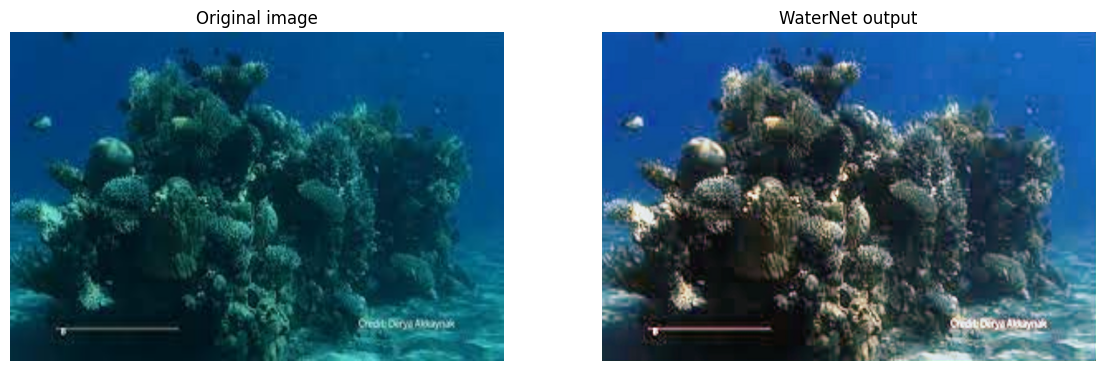

In [9]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 5))
ax[0].imshow(rgb_im)
ax[0].axis("off")
ax[0].set_title("Original image")

ax[1].imshow(out_im[0])
ax[1].axis("off")
ax[1].set_title("WaterNet output")

plt.show()